# **Insurance Premium Prediction**

**Project By: Ajali Augustine Esosa**

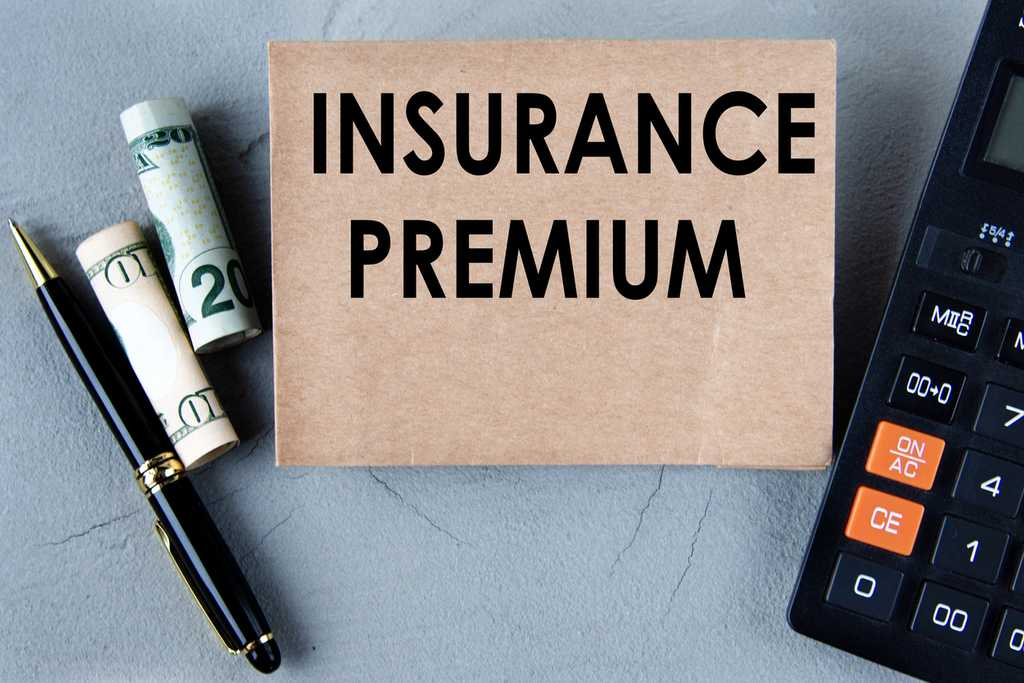

### **Introduction:**

In today's data-driven world, the insurance industry is undergoing a significant transformation by leveraging the power of data science. Data science, a multidisciplinary field that combines statistical analysis, machine learning, and predictive modelling, is revolutionizing the way insurance premiums are calculated. This project involves training and tesing various predictive models to determine which will be most efficient in predicting the Insurance Premium of an individual or a customer.

### **Understanding Insurance Premiums:**

Insurance premiums are the periodic payments made by policy holders to insurance companies in exchange for coverage against potential risks or losses. Traditionally, insurers relied on actuarial tables and historical data to assess risk and calculate premiums. However, this approach often led to generalized premium rates that didn't reflect an individual's specific risk profile accurately.


In [ ]:
# importing neccessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import plotly.express as px
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import pickle

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


let us load the data

In [ ]:
url = r'/content/drive/MyDrive/insurance.csv'
df = pd.read_csv(url)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


### **Data Cleaning and EDA**

In [ ]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
df.shape

(1338, 7)

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

here, we can conclude that the datasets have no missinf values

In [ ]:
# Convert numerical columns to objects (strings)
columns = ['sex', 'smoker', 'region']
df[columns] = df[columns].astype(str)

# Verify the data types after conversion
print(df.dtypes)


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [ ]:
# numerical feature
numerical_feature = {feature for feature in df.columns if df[feature].dtypes != 'O'}
print(f'Count of Numerical feature: {len(numerical_feature)}')
print(f'Numerical feature are:\n {numerical_feature}')

Count of Numerical feature: 4
Numerical feature are:
 {'charges', 'age', 'bmi', 'children'}


In [ ]:
# let check for  the numerical features
categorical_features = {feature for feature in df.columns if feature not in numerical_feature}
print(f"counts : {len(categorical_features)}")
print(f"numerical features : {categorical_features}")

counts : 3
numerical features : {'region', 'sex', 'smoker'}


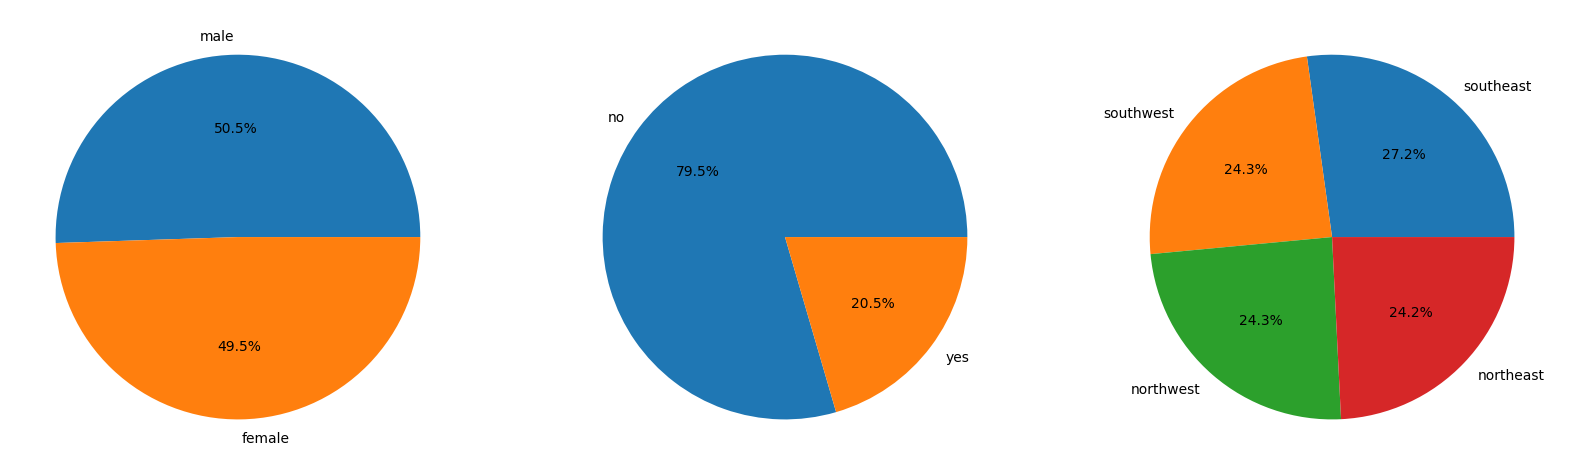

In [ ]:
features = ['sex', 'smoker', 'region']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
	plt.subplot(1, 3, i + 1)

	x = df[col].value_counts()
	plt.pie(x.values,
			labels=x.index,
			autopct='%1.1f%%')

plt.show()


The data provided to us is equally distributed among the sex and the region columns but in the smoker column, we can observe a ratio of 80:20.

In [ ]:
'''feature2 = ['sex', 'children', 'smoker', 'region']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(feature2):
	plt.subplot(2, 2, i + 1)
	df.groupby(col).mean()['charges'].plot.bar()
plt.show()
'''

"feature2 = ['sex', 'children', 'smoker', 'region']\n\nplt.subplots(figsize=(20, 10))\nfor i, col in enumerate(feature2):\n\tplt.subplot(2, 2, i + 1)\n\tdf.groupby(col).mean()['charges'].plot.bar()\nplt.show()\n"

Now let’s look at some of the observations which are shown in the above chats:

* Charges are on the higher side for males as compared to females but the difference is not that much.

* Premium charged from the smoker is around thrice that which is charged from non-smokers.

* Charges are approximately the same in the given four regions.


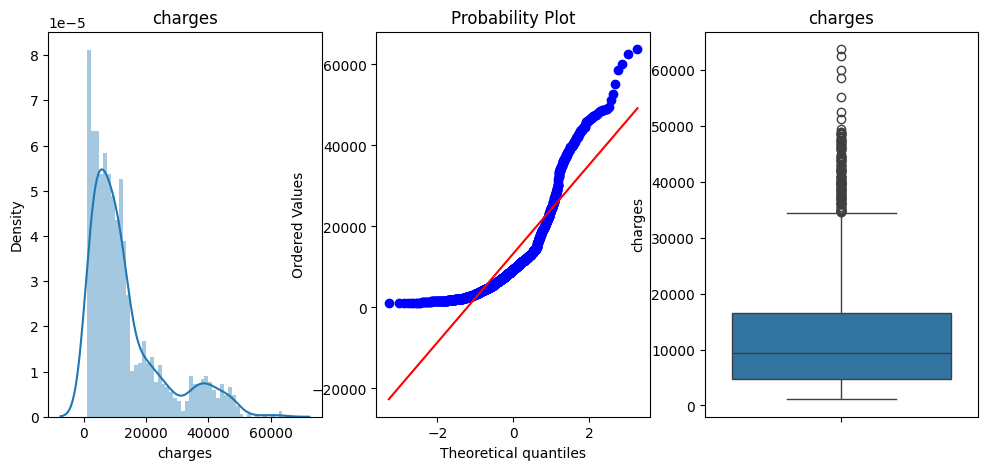

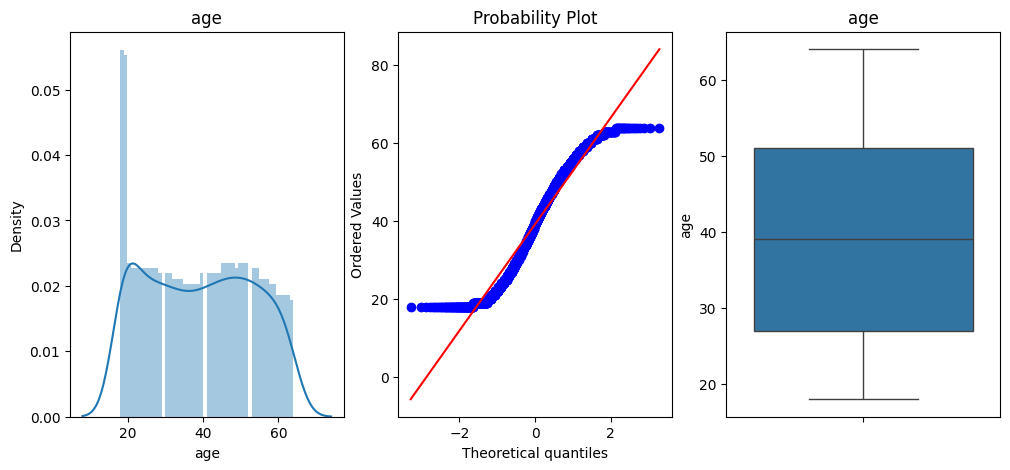

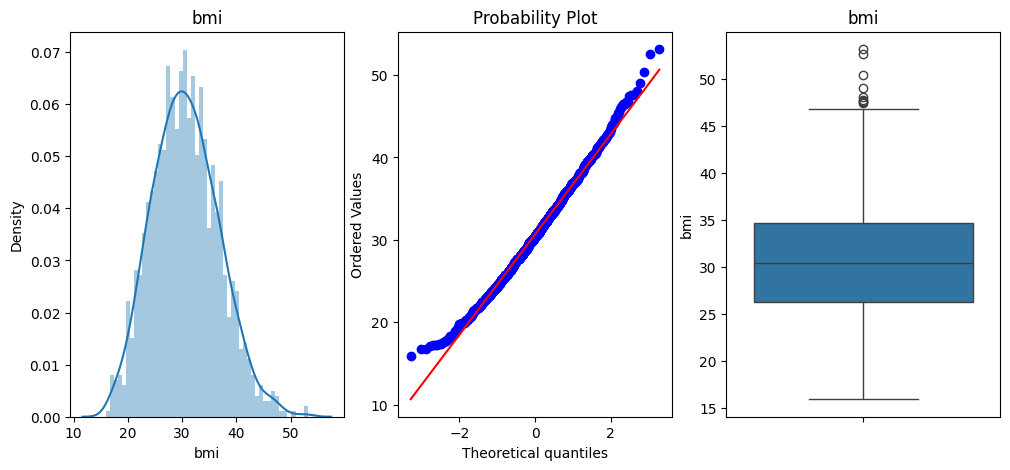

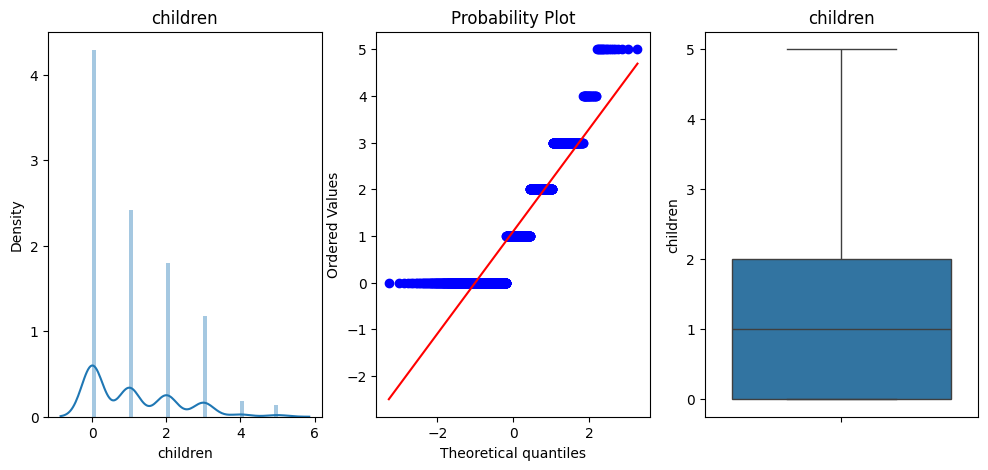

In [ ]:
for feature in numerical_feature:
  plt.figure(figsize=(12, 5))

  plt.subplot(1,3,1)
  plt.title(feature)
  sns.distplot(df[feature], bins=50)

  plt.subplot(1, 3, 2)
  plt.title(feature)
  stats.probplot(df[feature], dist='norm', plot=plt)

  plt.subplot(1, 3, 3)
  plt.title(feature)
  sns.boxplot(df[feature])

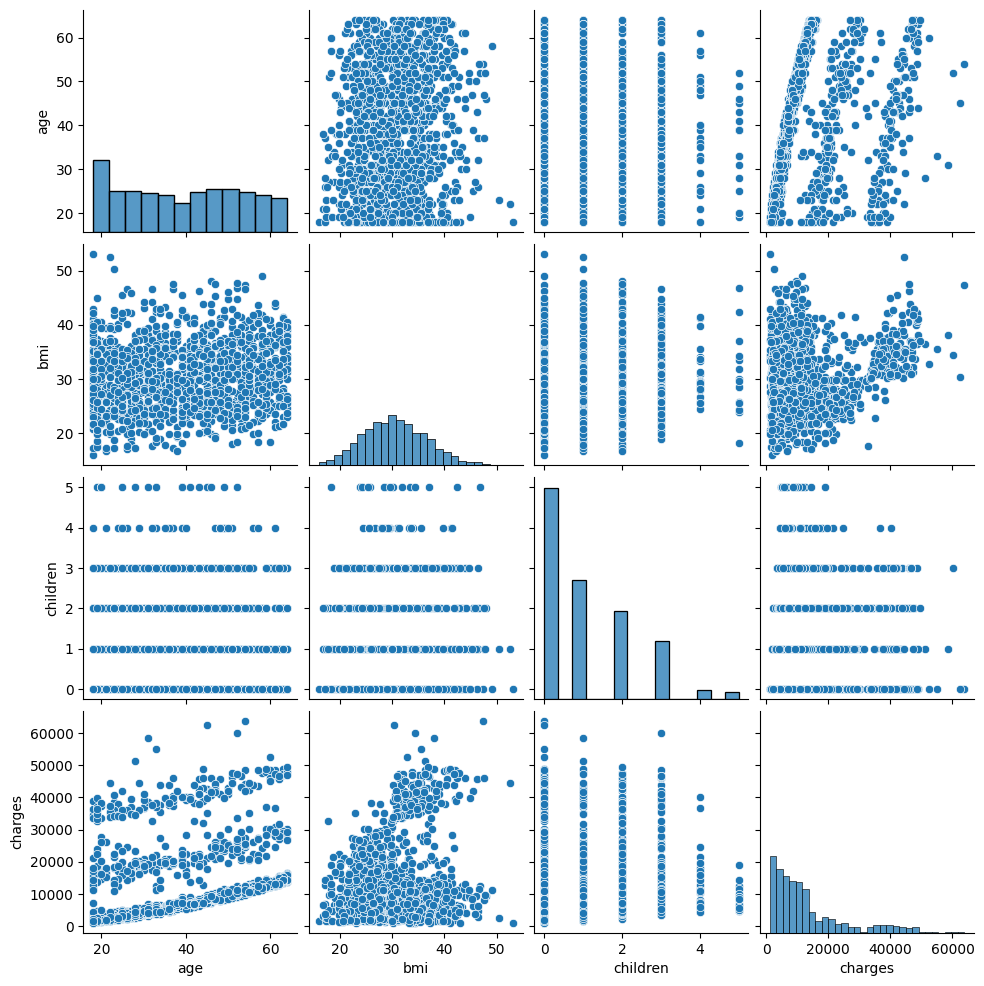

In [ ]:
# plot overall data
sns.pairplot(df)
plt.show()

A clear distinction can be observed here between the charges that smokers have to pay. Also here as well we can observe that as the age of a person increases premium prices goes up as well.



Due to the presence of outliers present in bmi column we need to treat the outliers by replacing the values with mean as the bmi column consists of continuous data.

## **Handling the outliers**

<Axes: ylabel='bmi'>

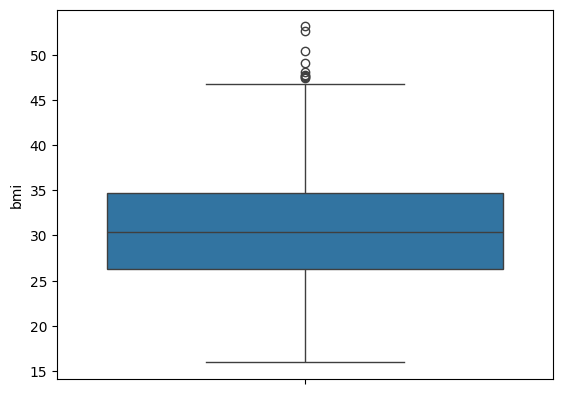

In [ ]:
sns.boxplot(df['bmi'])

Due to the presence of outliers present in bmi column we need to treat the outliers by replacing the values with mean as the bmi column consists of continuous data.



In [ ]:
Q1=df['bmi'].quantile(0.25)
Q2=df['bmi'].quantile(0.5)
Q3=df['bmi'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)


13.7
47.290000000000006


In [ ]:
pip install feature-engine


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.1/357.1 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 40.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.2.2 which is incompatible.


<Axes: ylabel='bmi'>

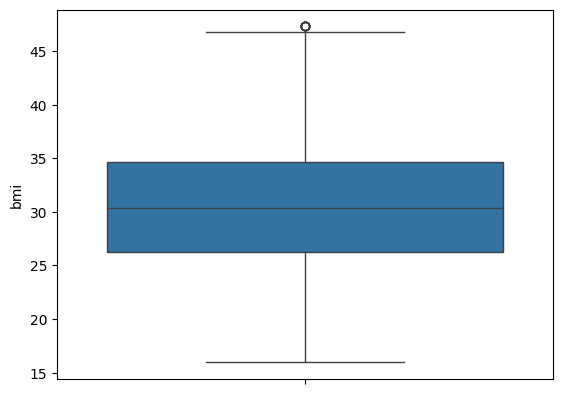

In [ ]:
from feature_engine.outliers import ArbitraryOutlierCapper
arb=ArbitraryOutlierCapper(min_capping_dict={'bmi':13.6749},max_capping_dict={'bmi':47.315})
df[['bmi']]=arb.fit_transform(df[['bmi']])
sns.boxplot(df['bmi'])


## **Feature engineering**


In [ ]:
for feature in categorical_features:
    print(df[feature].value_counts())


region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64
sex
male      676
female    662
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64


## **feature encoding**

In [ ]:
# male - 0, female - 1
df['sex'] = np.where(df['sex']=='male', 0, 1)

# yes - 0, no - 1
df['smoker'] = np.where(df['smoker']=='yes', 0, 1)

# assing value by using dict method
dict_region = {'southeast': 0,
               'southwest': 1,
               'northeast': 2,
               'northwest': 3}
df['region'] = df.region.map(dict_region)


In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


## **Fit into Algorithm**

In [ ]:
X = df.drop(['charges'], axis=1)
Y = df[['charges']]

In [ ]:
# split into train and test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# cross validation test
score = {}
def cv_score(estimator):
  return np.mean(cross_val_score(estimator=estimator, X=X, y=Y, cv=5))

we will be training several model, this will help us pick the best and most accurate

In [ ]:
# linear regression
lreg = LinearRegression()
lreg.fit(x_train, y_train)
lr_pred = lreg.predict(x_test)
score['Linear Regression'] = cv_score(LinearRegression())

# ridge regressor(L2, Regularization)
ridge = Ridge()
ridge.fit(x_train, y_train)
ridge_pred = ridge.predict(x_test)
score['Ridge Regression'] = cv_score(Ridge())

# Lasso Regression(L1 regularization)
lasso = Lasso()
lasso.fit(x_train, y_train)
lasso_pred = lasso.predict(x_test)
score['Lasso Regression'] = cv_score(Lasso())

# RandomForest regressor
rand = RandomForestRegressor()
rand.fit(x_train, y_train)
rand_pred = rand.predict(x_test)
score['Random Regressor'] = cv_score(RandomForestRegressor())

# decision Tree regressor
tree = DecisionTreeRegressor()
tree.fit(x_train, y_train)
tree_pred = tree.predict(x_test)
score['DecisionTree Regressor'] = cv_score(DecisionTreeRegressor())


other models

In [ ]:
# AdaBoost Regression
Adr = AdaBoostRegressor()
Adr.fit(x_train, y_train)
Adr_pred = Adr.predict(x_test)
score['AdaBoost Regressor'] = cv_score(AdaBoostRegressor())

# Kneighbor Regressor
Knr = KNeighborsRegressor()
Knr.fit(x_train, y_train)
Knr_pred = Knr.predict(x_test)
score['KNeighbors Regressor'] = cv_score(KNeighborsRegressor())

# GradientBoosting Regressor
Gbr = GradientBoostingRegressor()
Gbr.fit(x_train, y_train)
Gbr_pred = Gbr.predict(x_test)
score['GradientBoosting Regressor'] = cv_score(GradientBoostingRegressor())

# simple vector Regressor SVR
svr = SVR()
svr.fit(x_train, y_train)
svr_pred = svr.predict(x_test)
score['SVR'] = cv_score(SVR())

# ExtraTree Regreesor
Etree = ExtraTreeRegressor()
Etree.fit(x_train, y_train)
Etree_pred = Etree.predict(x_test)
score['ExtraTree Regressor'] = cv_score(ExtraTreeRegressor())



here we will display the score of each model

In [ ]:
for x in score:
  print(f"{x} : {score[x]}")

Linear Regression : 0.7471208308220975
Ridge Regression : 0.7471182465881239
Lasso Regression : 0.747129495965799
Random Regressor : 0.8348814792123467
DecisionTree Regressor : 0.7065311131823545
AdaBoost Regressor : 0.8222638400236433
KNeighbors Regressor : 0.08829975971640609
GradientBoosting Regressor : 0.854933976129613
SVR : -0.10362820822067213
ExtraTree Regressor : 0.6897790494805174


we can conclude that the GradientBoosting model is more accurate in predicting the charges with about 85.46%  accuracy

the random forest regressor is next with an accuracy of about 83.51%

We will perform hyper parametric tunning to get the best parameters to improve the performance of our model

## **Hyperparameter for GradientBoosting Regresssor**


In [ ]:
# Hyperparameter for GradientBoosting Regresssor
para = {'loss': ['ls', 'lad', 'huber', 'quantile'],
        'learning_rate': [0.01,0.03,0.05,0.07,0.9, 0.1],
        'n_estimators': [100, 1000, 50],
        'criterion': ['friedman_mse', 'mse', 'mae'],
        'min_samples_split': [1,20,2],
        'min_samples_leaf': [1,20,2],
        'max_depth': [3,500, 5]}


In [ ]:
# Using RandomSearchCV for hyperparameter tunning
GBRegressor_grid = RandomizedSearchCV(GradientBoostingRegressor(),
                            param_distributions=para, n_iter=100, cv=5)

GBRegressor_grid.fit(x_train, y_train)
pred_gbr = GBRegressor_grid.predict(x_test)


In [ ]:
print(f"GB Regressor: {r2_score(Gbr_pred, y_test)}")

GB Regressor: 0.8628166010172846


the GradientBoosting Regressor predict with a 0.863 accuracy after hyper parametric tuning was done to imporve the model

we can say the model's accuracy didnt increase by much

In [ ]:
GBRegressor_grid.best_params_

{'n_estimators': 1000,
 'min_samples_split': 20,
 'min_samples_leaf': 2,
 'max_depth': 3,
 'loss': 'huber',
 'learning_rate': 0.05,
 'criterion': 'friedman_mse'}

now we plot the test and predicted values

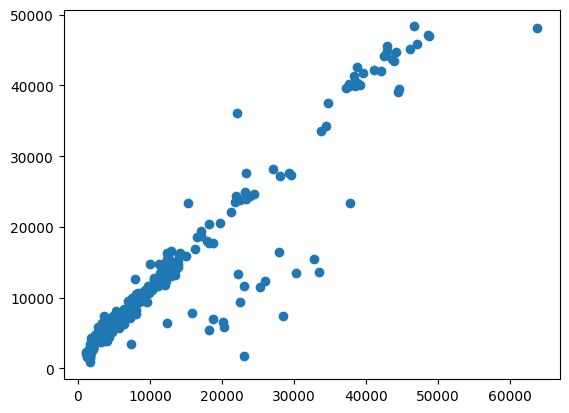

In [ ]:
plt.scatter(y_test, Gbr_pred)

## **AdaBoost Regressor**

In [ ]:
# Hyperparameter tunning for AdaBoostRegressor
para = { 'n_estimators':[50, 500, 100],
        'learning_rate':[0.01,0.03,0.05, 0.07, 0.09,1, 1.5],
        'loss':['linear','square', 'exponential'],
        'random_state': [0,45,5]}


In [ ]:
Ada_grid = RandomizedSearchCV(AdaBoostRegressor(), param_distributions=para,
                              n_iter=100, cv=5)
Ada_grid.fit(x_train, y_train)
pred_ada = Ada_grid.predict(x_test)


In [ ]:
print(f"ADA Regressor : {r2_score(pred_ada, y_test)}")

ADA Regressor : 0.8351467842160539


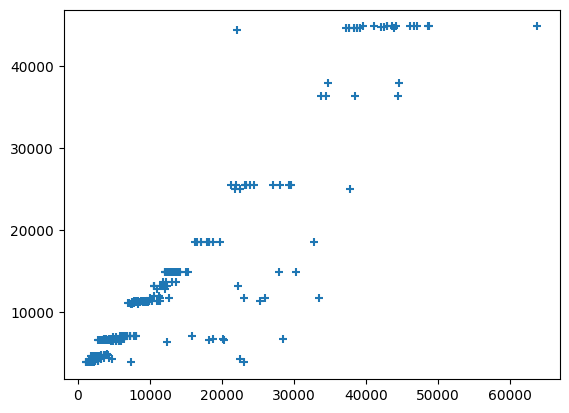

In [ ]:
# PLotting the test and predicted value
plt.scatter(y_test, pred_ada, marker='+')

## **Hypertunning for RandomForest**

In [ ]:
# Hypertunning parameter for RandomForestRegressor
para = {'criterion': ['absolute_error', 'poisson', 'squared_error', 'friedman_mse'],
        'max_depth': [ 3, 500, 10],
        'max_features': ['auto', 'sqrt','log2', None],
        'min_samples_leaf': [0, 0.5, 0.7, 1, 3, 5, 7],
        'min_samples_split' : [ 1, 20, 2],
        'n_estimators' : [100, 1200, 100],
        'random_state':[0,45,5]
    }

# Initialize RandomForestRegressor
RFRegressor = RandomForestRegressor()

# Initialize RandomizedSearchCV
RFRegressor_grid = RandomizedSearchCV(estimator=RFRegressor, param_distributions=para, n_iter=100, cv=5)

# Fit the RandomizedSearchCV
RFRegressor_grid.fit(x_train, y_train)
pred_rfr = RFRegressor_grid.predict(x_test)


In [ ]:
print(f"RabdomForest Regressor : {r2_score(pred_rfr, y_test)}")

RabdomForest Regressor : 0.8662699980477649


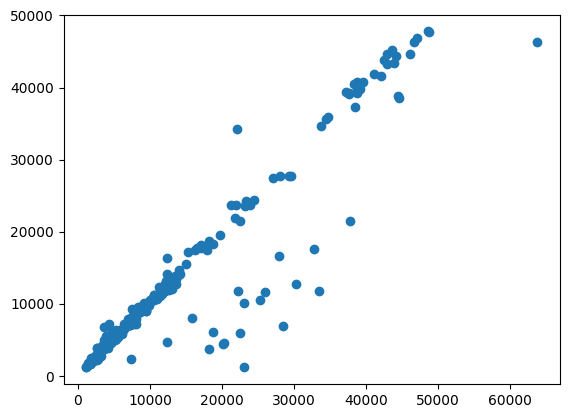

In [ ]:
# PLotting the test and predicted value
plt.scatter(y_test, pred_rfr)

the model performance improved abit after hypertunning

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgmodel=XGBRegressor()
xgmodel.fit(x_train,y_train)
ypredtrain4=xgmodel.predict(x_train)
ypredtest4=xgmodel.predict(x_test)
print(r2_score(y_train,ypredtrain4))
print(r2_score(y_test,ypredtest4))
print(cross_val_score(xgmodel,X,Y,cv=5,).mean())
from sklearn.model_selection import GridSearchCV
estimator=XGBRegressor()
param_grid={'n_estimators':[10,15,20,40,50],'max_depth':[3,4,5],'gamma':[0,0.15,0.3,0.5,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(x_train,y_train)
print(grid.best_params_)
xgmodel=XGBRegressor(n_estimators=15,max_depth=3,gamma=0)
xgmodel.fit(x_train,y_train)
ypredtrain4=xgmodel.predict(x_train)
ypredtest4=xgmodel.predict(x_test)
print(r2_score(y_train,ypredtrain4))
print(r2_score(y_test,ypredtest4))
print(cross_val_score(xgmodel,X,Y,cv=5,).mean())


0.9943784819136926
0.8330121415228967
0.8082737652382193
{'gamma': 0, 'max_depth': 3, 'n_estimators': 10}
0.8766640332835837
0.8839257943931321
0.8621053233807418


## **Saving the RandomForest model**

In [ ]:
pickle.dump(RFRegressor_grid,open('insurance_pred_RFModel.pkl', 'wb'))

In [ ]:
load_model = pickle.load(open("insurance_pred_RFModel.pkl", "rb"))


In [ ]:
load_model.score(x_test, y_test)


0.8797142382752412

## **saving the XGB model**

In [ ]:
pickle.dump(xgmodel,open('insurance_pred_XGBModel.pkl', 'wb'))

In [ ]:
load_model_xgb = pickle.load(open("insurance_pred_XGBModel.pkl", "rb"))


In [ ]:
load_model_xgb.score(x_test, y_test)


0.8839257943931321

## **Conclusion**
Out of all the models XGBoost model is giving the highest accuracy this means predictions made by this model are more than 88% close to the real values as compared to the other model.

The dataset we have used here was small still the conclusion we drew from them were quite similar to what is observed in the real-life scenario. If we would have a bigger dataset then we will be able to learn even deeper patterns in the relation between the independent features and the premium charged from the buyers.

